In [22]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import Ridge
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import LabelEncoder

In [23]:
df = pd.read_csv('dataset.csv', sep=',', quotechar='"')
df.head()

,Unnamed: 0,track_id,artists,album_name,track_name,popularity,duration_ms,explicit,danceability,energy,...,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_genre
0,0,5SuOikwiRyPMVoIQDJUgSV,Gen Hoshino,Comedy,Comedy,73,230666,False,0.676,0.4610,...,-6.746,0,0.1430,0.0322,0.000001,0.3580,0.715,87.917,4,acoustic
1,1,4qPNDBW1i3p13qLCt0Ki3A,Ben Woodward,Ghost (Acoustic),Ghost - Acoustic,55,149610,False,0.420,0.1660,...,-17.235,1,0.0763,0.9240,0.000006,0.1010,0.267,77.489,4,acoustic
2,2,1iJBSr7s7jYXzM8EGcbK5b,Ingrid Michaelson;ZAYN,To Begin Again,To Begin Again,57,210826,False,0.438,0.3590,...,-9.734,1,0.0557,0.2100,0.000000,0.1170,0.120,76.332,4,acoustic
3,3,6lfxq3CG4xtTiEg7opyCyx,Kina Grannis,Crazy Rich Asians (Original Motion Picture Sou...,Can't Help Falling In Love,71,201933,False,0.266,0.0596,...,-18.515,1,0.0363,0.9050,0.000071,0.1320,0.143,181.740,3,acoustic
4,4,5vjLSffimiIP26QG5WcN2K,Chord Overstreet,Hold On,Hold On,82,198853,False,0.618,0.4430,...,-9.681,1,0.0526,0.4690,0.000000,0.0829,0.167,119.949,4,acoustic


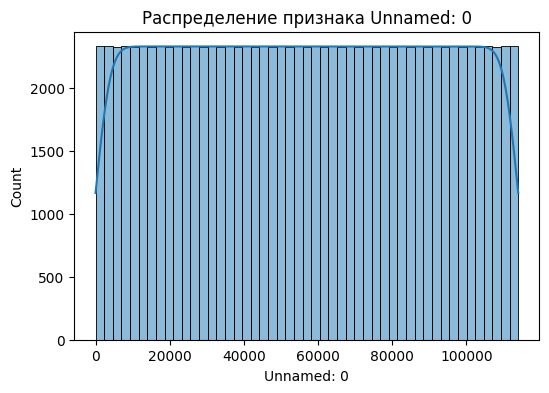

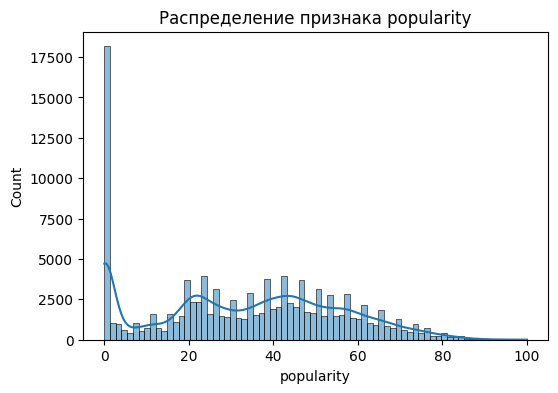

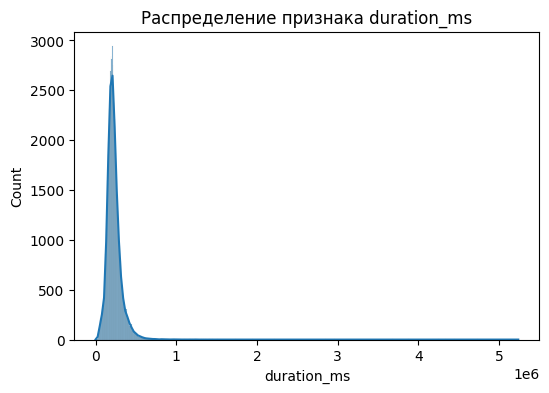

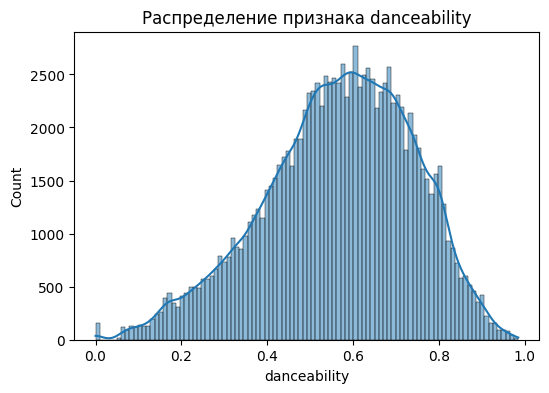

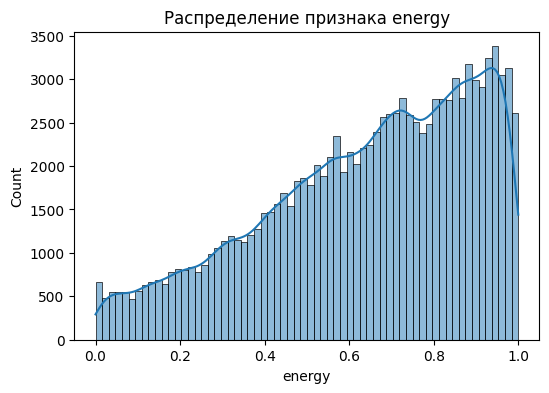

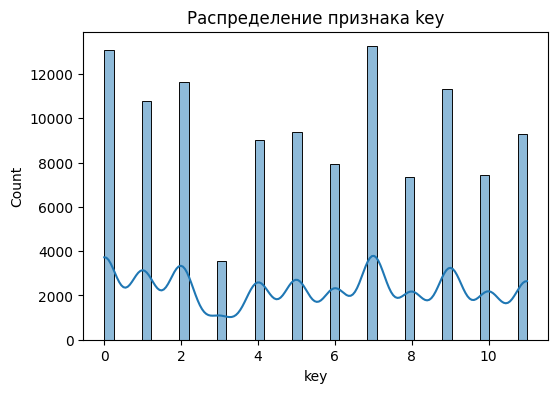

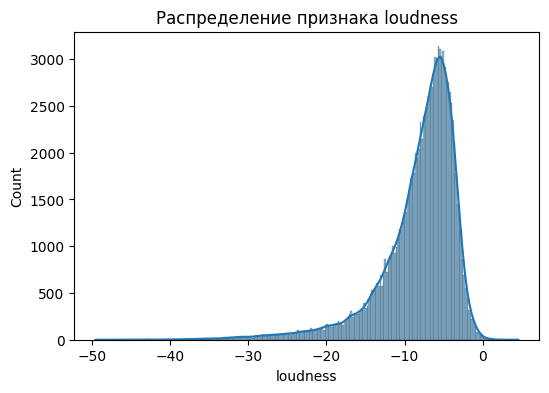

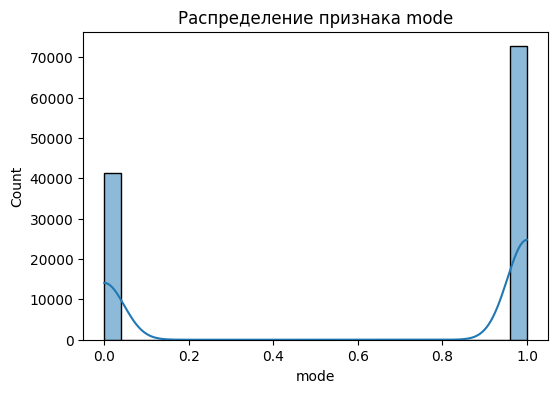

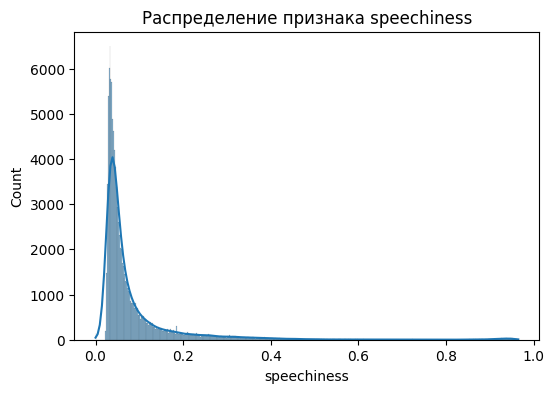

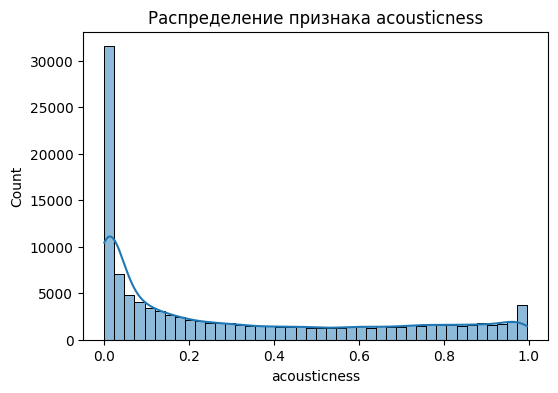

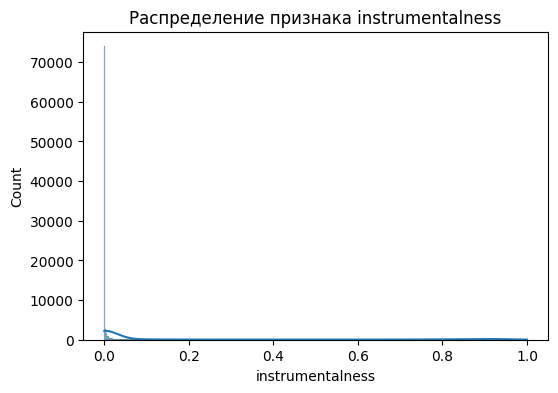

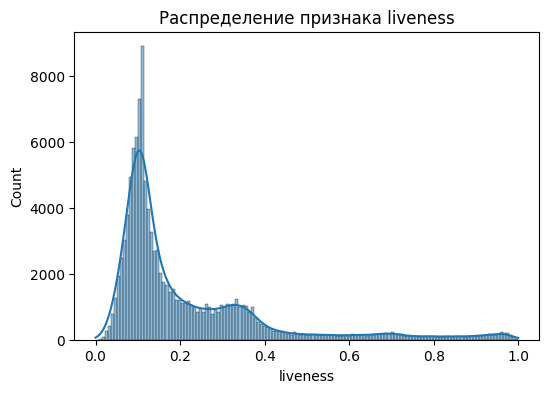

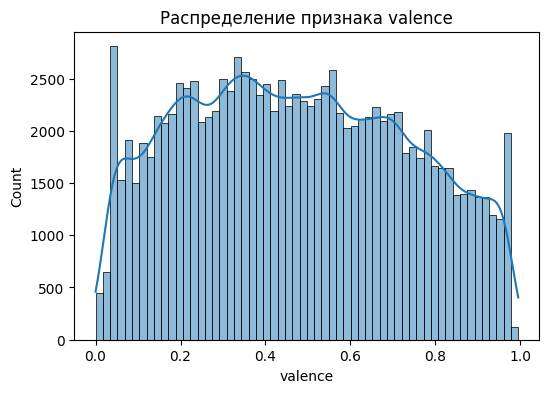

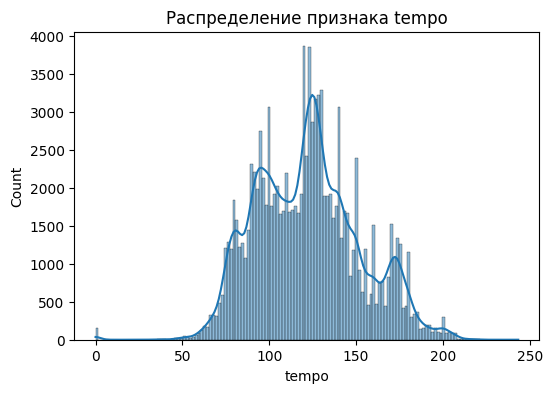

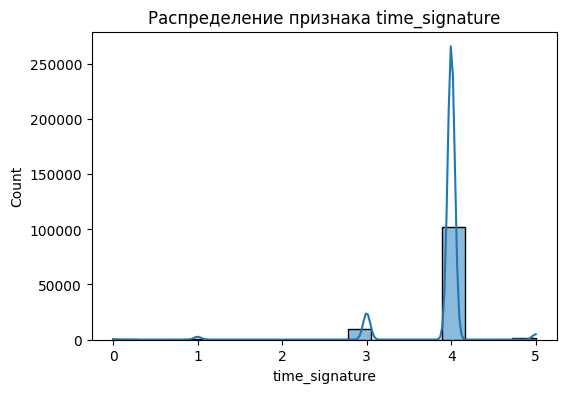

In [24]:
num_cols = df.select_dtypes(include='number').columns

for col in num_cols:
    plt.figure(figsize=(6, 4))
    sns.histplot(df[col], kde=True)
    plt.title(f'Распределение признака {col}')
    plt.show()

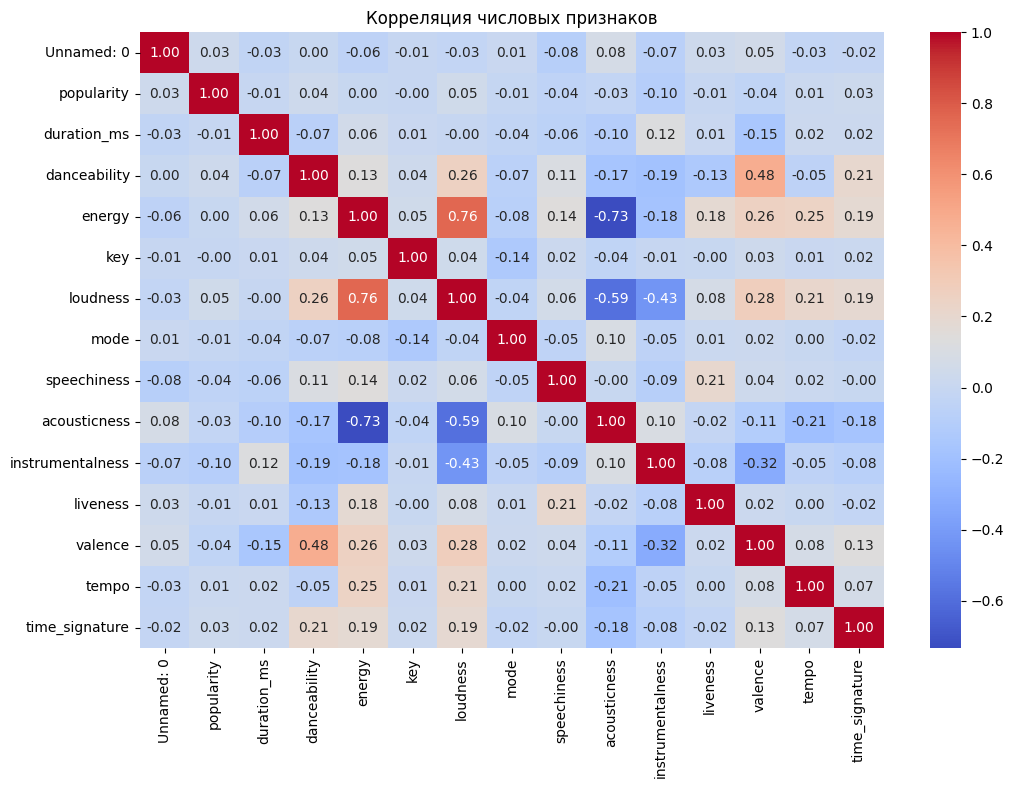

In [25]:
plt.figure(figsize=(12, 8))
sns.heatmap(df[num_cols].corr(), annot=True, fmt='.2f', cmap='coolwarm')
plt.title("Корреляция числовых признаков")
plt.show()

In [26]:
columns_to_drop = ['track_name', 'artist_name', 'id', 'uri', 'album', 'release_date']
df = df.drop(columns=columns_to_drop, errors='ignore')

y = df['popularity']
X = df.drop(columns=['popularity'], errors='ignore')

high_card_cols = X.select_dtypes(include='object').nunique()
high_card_cols = high_card_cols[high_card_cols > 100].index.tolist()
X = X.drop(columns=high_card_cols, errors='ignore')

In [27]:
for col in X.select_dtypes(include='object').columns:
    le = LabelEncoder()
    X[col] = le.fit_transform(X[col])

In [28]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

models = {
    "Ridge": Ridge(),
    "Decision Tree": DecisionTreeRegressor(),
    "Gradient Boosting": GradientBoostingRegressor(),
    "MLP Neural Net": MLPRegressor(max_iter=500)
}

for name, model in models.items():
    scores = cross_val_score(model, X, y, cv=5, scoring='neg_root_mean_squared_error')
    print(f"{name}: Среднее RMSE = {-scores.mean():.2f}")

Ridge: Среднее RMSE = 22.28
Decision Tree: Среднее RMSE = 34.73
Gradient Boosting: Среднее RMSE = 24.66
MLP Neural Net: Среднее RMSE = 210.27


In [31]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=43)

models = {
    "Ridge": Ridge(),
    "Decision Tree": DecisionTreeRegressor(),
    "Gradient Boosting": GradientBoostingRegressor(),
    "MLP Neural Net": MLPRegressor(max_iter=500)
}

for name, model in models.items():
    scores = cross_val_score(model, X, y, cv=5, scoring='neg_root_mean_squared_error')
    print(f"{name}: Среднее RMSE = {-scores.mean():.2f}")

Ridge: Среднее RMSE = 22.28
Decision Tree: Среднее RMSE = 35.41
Gradient Boosting: Среднее RMSE = 24.66
MLP Neural Net: Среднее RMSE = 84.20


In [32]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=44)

models = {
    "Ridge": Ridge(),
    "Decision Tree": DecisionTreeRegressor(),
    "Gradient Boosting": GradientBoostingRegressor(),
    "MLP Neural Net": MLPRegressor(max_iter=500)
}

for name, model in models.items():
    scores = cross_val_score(model, X, y, cv=5, scoring='neg_root_mean_squared_error')
    print(f"{name}: Среднее RMSE = {-scores.mean():.2f}")

Ridge: Среднее RMSE = 22.28
Decision Tree: Среднее RMSE = 35.21
Gradient Boosting: Среднее RMSE = 24.76
MLP Neural Net: Среднее RMSE = 36.63


In [33]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=45)

models = {
    "Ridge": Ridge(),
    "Decision Tree": DecisionTreeRegressor(),
    "Gradient Boosting": GradientBoostingRegressor(),
    "MLP Neural Net": MLPRegressor(max_iter=500)
}

for name, model in models.items():
    scores = cross_val_score(model, X, y, cv=5, scoring='neg_root_mean_squared_error')
    print(f"{name}: Среднее RMSE = {-scores.mean():.2f}")

Ridge: Среднее RMSE = 22.28
Decision Tree: Среднее RMSE = 35.06
Gradient Boosting: Среднее RMSE = 24.66
MLP Neural Net: Среднее RMSE = 38.15


In [34]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=46)

models = {
    "Ridge": Ridge(),
    "Decision Tree": DecisionTreeRegressor(),
    "Gradient Boosting": GradientBoostingRegressor(),
    "MLP Neural Net": MLPRegressor(max_iter=500)
}

for name, model in models.items():
    scores = cross_val_score(model, X, y, cv=5, scoring='neg_root_mean_squared_error')
    print(f"{name}: Среднее RMSE = {-scores.mean():.2f}")

Ridge: Среднее RMSE = 22.28
Decision Tree: Среднее RMSE = 35.23
Gradient Boosting: Среднее RMSE = 24.65
MLP Neural Net: Среднее RMSE = 64.23


In [36]:
best_model = GradientBoostingRegressor()
best_model.fit(X_train, y_train)

y_pred = best_model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
print(f"Финальное RMSE на тесте: {rmse:.2f}")

Финальное RMSE на тесте: 19.87


In [37]:
best_model = Ridge()
best_model.fit(X_train, y_train)

y_pred = best_model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
print(f"Финальное RMSE на тесте: {rmse:.2f}")

Финальное RMSE на тесте: 22.04
